# TensorFlow - CNN
## Eduardo Gomes Sanglard - IAA 2022
### Laboratório de Inteligência Artifical - Frameworks de IA

- Fashion MNIST: Classificação de imagens
- CIFAR10 : Classificação de imagens

Link para este notebook no Google Colab
https://drive.google.com/file/d/1mnjXU2CNlfe-DC5qiHk1UB-LWaMkv9UR/view?usp=sharing

Importação de bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Set CheckPoint Saver and CallBack

In [2]:
path_to_save_model = './Fashion_MNIST'
ckpt_saver = ModelCheckpoint(
    path_to_save_model,
    monitor="val_accuracy",
    mode='max',
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

## Fashion MNIST
Carga e normalização dos dados

In [3]:
# Carga dos dados
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
# Adicionar uma dimensão:
# N x H x W -> N x H x W x C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


In [4]:
# número de classes

# Experimentos:
# - Adicionar uma camada de MaxPooling2D após cada cadade de Convolução
# - Adicionar uma camada de BatchNormalization após o MaxPool2D
# - Melhor Acucácia: 0.8756

K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = MaxPool2D()(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = MaxPool2D()(x)
x = BatchNormalization()(x)
#x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
#x = MaxPool2D()(x)
#x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

In [5]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15,
callbacks=[ckpt_saver, early_stop])

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.8002
Epoch 1: val_accuracy improved from -inf to 0.84260, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 26s 6ms/step - loss: 0.5532 - accuracy: 0.8002 - val_loss: 0.4402 - val_accuracy: 0.8426
Epoch 2/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8440
Epoch 2: val_accuracy improved from 0.84260 to 0.85030, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4250 - accuracy: 0.8440 - val_loss: 0.4081 - val_accuracy: 0.8503
Epoch 3/15
1863/1875 [============================>.] - ETA: 0s - loss: 0.3916 - accuracy: 0.8572
Epoch 3: val_accuracy improved from 0.85030 to 0.85710, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3915 - accuracy: 0.8573 - val_loss: 0.3861 - val_accuracy: 0.8571
Epoch 4/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8636
Epoch 4: val_accuracy improved from 0.85710 to 0.85730, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 12s 6ms/step - loss: 0.3693 - accuracy: 0.8636 - val_loss: 0.3882 - val_accuracy: 0.8573
Epoch 5/15
1873/1875 [============================>.] - ETA: 0s - loss: 0.3551 - accuracy: 0.8686
Epoch 5: val_accuracy improved from 0.85730 to 0.87320, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3549 - accuracy: 0.8686 - val_loss: 0.3564 - val_accuracy: 0.8732
Epoch 6/15
1864/1875 [============================>.] - ETA: 0s - loss: 0.3406 - accuracy: 0.8729
Epoch 6: val_accuracy did not improve from 0.87320
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3410 - accuracy: 0.8729 - val_loss: 0.3482 - val_accuracy: 0.8729
Epoch 7/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.3315 - accuracy: 0.8770
Epoch 7: val_accuracy improved from 0.87320 to 0.87520, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 12s 6ms/step - loss: 0.3314 - accuracy: 0.8771 - val_loss: 0.3447 - val_accuracy: 0.8752
Epoch 8/15
1873/1875 [============================>.] - ETA: 0s - loss: 0.3231 - accuracy: 0.8797
Epoch 8: val_accuracy did not improve from 0.87520
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3230 - accuracy: 0.8798 - val_loss: 0.3382 - val_accuracy: 0.8750
Epoch 9/15
1865/1875 [============================>.] - ETA: 0s - loss: 0.3183 - accuracy: 0.8818
Epoch 9: val_accuracy improved from 0.87520 to 0.88160, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 10s 6ms/step - loss: 0.3181 - accuracy: 0.8818 - val_loss: 0.3350 - val_accuracy: 0.8816
Epoch 10/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8845
Epoch 10: val_accuracy did not improve from 0.88160
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3109 - accuracy: 0.8845 - val_loss: 0.3479 - val_accuracy: 0.8736
Epoch 11/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.8872
Epoch 11: val_accuracy improved from 0.88160 to 0.88370, saving model to ./Fashion_MNIST


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3043 - accuracy: 0.8872 - val_loss: 0.3300 - val_accuracy: 0.8837
Epoch 12/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.8886
Epoch 12: val_accuracy did not improve from 0.88370
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2988 - accuracy: 0.8886 - val_loss: 0.3609 - val_accuracy: 0.8688
Epoch 13/15
1871/1875 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.8910
Epoch 13: val_accuracy did not improve from 0.88370
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2946 - accuracy: 0.8910 - val_loss: 0.3331 - val_accuracy: 0.8827


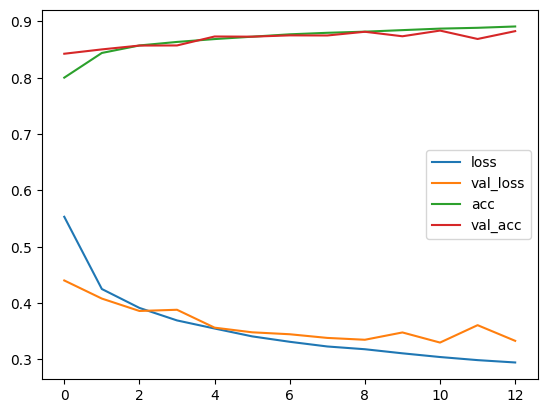

In [6]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

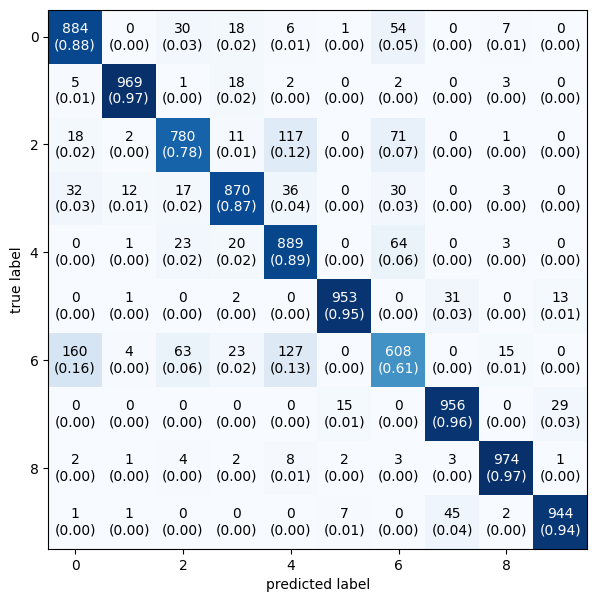

In [7]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: Shirt Predicted: Dress')

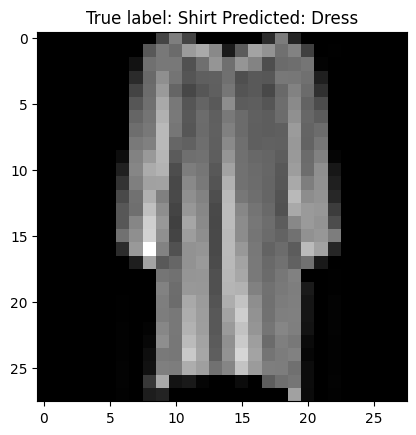

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 
          'Bag', 'Ankle boot']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]],
labels[y_pred[i]]))

## CIFAR10

In [9]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


In [10]:
# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

In [11]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5616 - accuracy: 0.4305 - val_loss: 1.2665 - val_accuracy: 0.5395
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2654 - accuracy: 0.5447 - val_loss: 1.1269 - val_accuracy: 0.5936
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1407 - accuracy: 0.5914 - val_loss: 1.0323 - val_accuracy: 0.6372
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0399 - accuracy: 0.6279 - val_loss: 0.9779 - val_accuracy: 0.6575
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9642 - accuracy: 0.6548 - val_loss: 0.9612 - val_accuracy: 0.6628
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9053 - accuracy: 0.6781 - val_loss: 0.9214 - val_accuracy: 0.6817
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8520 - accuracy: 0.6973 - val_loss: 0.8472 - val_accuracy

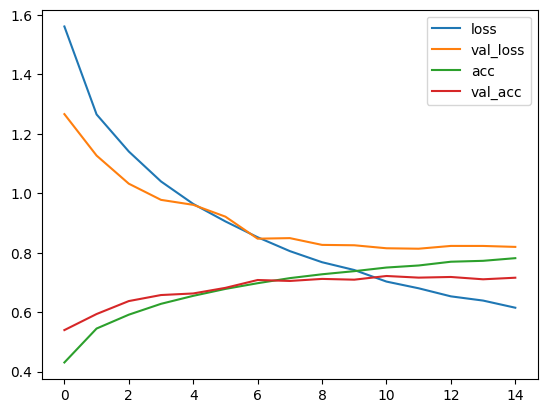

In [12]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

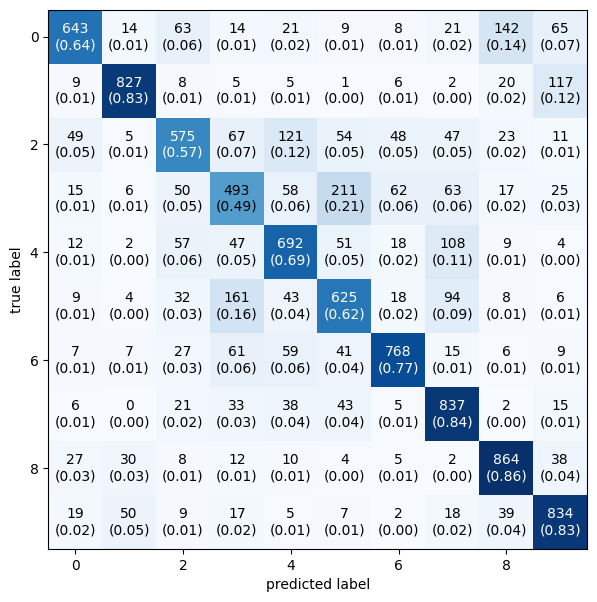

In [13]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: airplane Predicted: automobile')

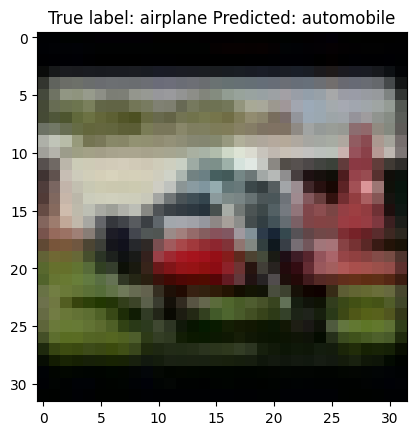

In [14]:
# Mostrar algumas classificaç!oes erradas
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))